In [4]:
import numpy as np 
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns

data_2021 = pd.read_csv('../DATASET/2021/Hasil_2021.csv')
data_2022 = pd.read_csv('../DATASET/2022/Hasil_2022.csv')
data_2023 = pd.read_csv('../DATASET/2023/Hasil_2023.csv')
data_JP = pd.read_csv('../DATASET/Jumlah penduduk/Jumlah Penduduk .csv')
data_KP = pd.read_csv('../DATASET/Kapasitas Pembangkit/Kapasitas Pembangkit Listrik.csv')
data_final = pd.read_csv('../DATASET/Hasil_Gabungan.csv')

datasets = {
    '2021': data_2021,
    '2022': data_2022,
    '2023': data_2023,
    'JP': data_JP,
    'KP': data_KP
}


In [5]:
features_2021 = ['Residential_2021', 'Business_2021', 'Industrial_2021', 'Social_2021', 'Gov_Office_2021', 'Pub_Street_2021', 'Total_2021', 'JP_2021', 'KP_2021']

data_T2021 = data_final[features_2021]
robust_scaler = RobustScaler()
data_scaled_2021 = robust_scaler.fit_transform(data_T2021)

kmeans_robust = KMeans(n_clusters=2, random_state=45)
data_T2021['Cluster_Robust'] = kmeans_robust.fit_predict(data_scaled_2021)

centroids_robust = kmeans_robust.cluster_centers_
print("Centroid dengan RobustScaler:", centroids_robust)

Centroid dengan RobustScaler: [[ 3.66434404e-02  5.78930416e-03  2.07591742e-01  1.43752454e-01
  -8.53526510e-02  1.02980540e-01  1.17565806e-01  4.86497306e-03
   1.49666516e-01]
 [ 5.58536916e+00  6.07723892e+00  1.30394364e+01  5.73860582e+00
   6.96702838e+00  2.91035888e+00  7.65048012e+00  4.42040156e+00
   7.06140566e+00]]


C:\Users\Jeff\AppData\Local\Temp\ipykernel_5688\390402832.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_T2021['Cluster_Robust'] = kmeans_robust.fit_predict(data_scaled_2021)


In [6]:
data_final['Cluster_Robust'] = kmeans_robust.fit_predict(data_scaled_2021)
provinsi_per_cluster = data_final[['Province', 'Cluster_Robust']].sort_values(by='Cluster_Robust')

for cluster in range(2):  
    print(f"Provinsi dalam Cluster {cluster}:")
    print(provinsi_per_cluster[provinsi_per_cluster['Cluster_Robust'] == cluster]['Province'].tolist())
    print("\n")

Provinsi dalam Cluster 0:
['Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Kep. Riau', 'Sumatera Selatan', 'Jambi', 'Bengkulu', 'Kep. Bangka Belitung', 'Lampung', 'Kalimantan Barat', 'Kalimantan Selatan', 'Kalimantan Tengah', 'Sulawesi Utara', 'Gorontalo', 'Sulawesi Tengah', 'Sulawesi Selatan', 'Sulawesi Tenggara', 'Sulawesi Barat', 'Maluku', 'Maluku Utara', 'Papua', 'Papua Barat', 'Bali', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'DI Yogyakarta', 'Kalimantan Timur', 'Kalimantan Utara']


Provinsi dalam Cluster 1:
['Jawa Barat', 'Jawa Tengah', 'Jawa Timur', 'DKI Jakarta', 'Banten']




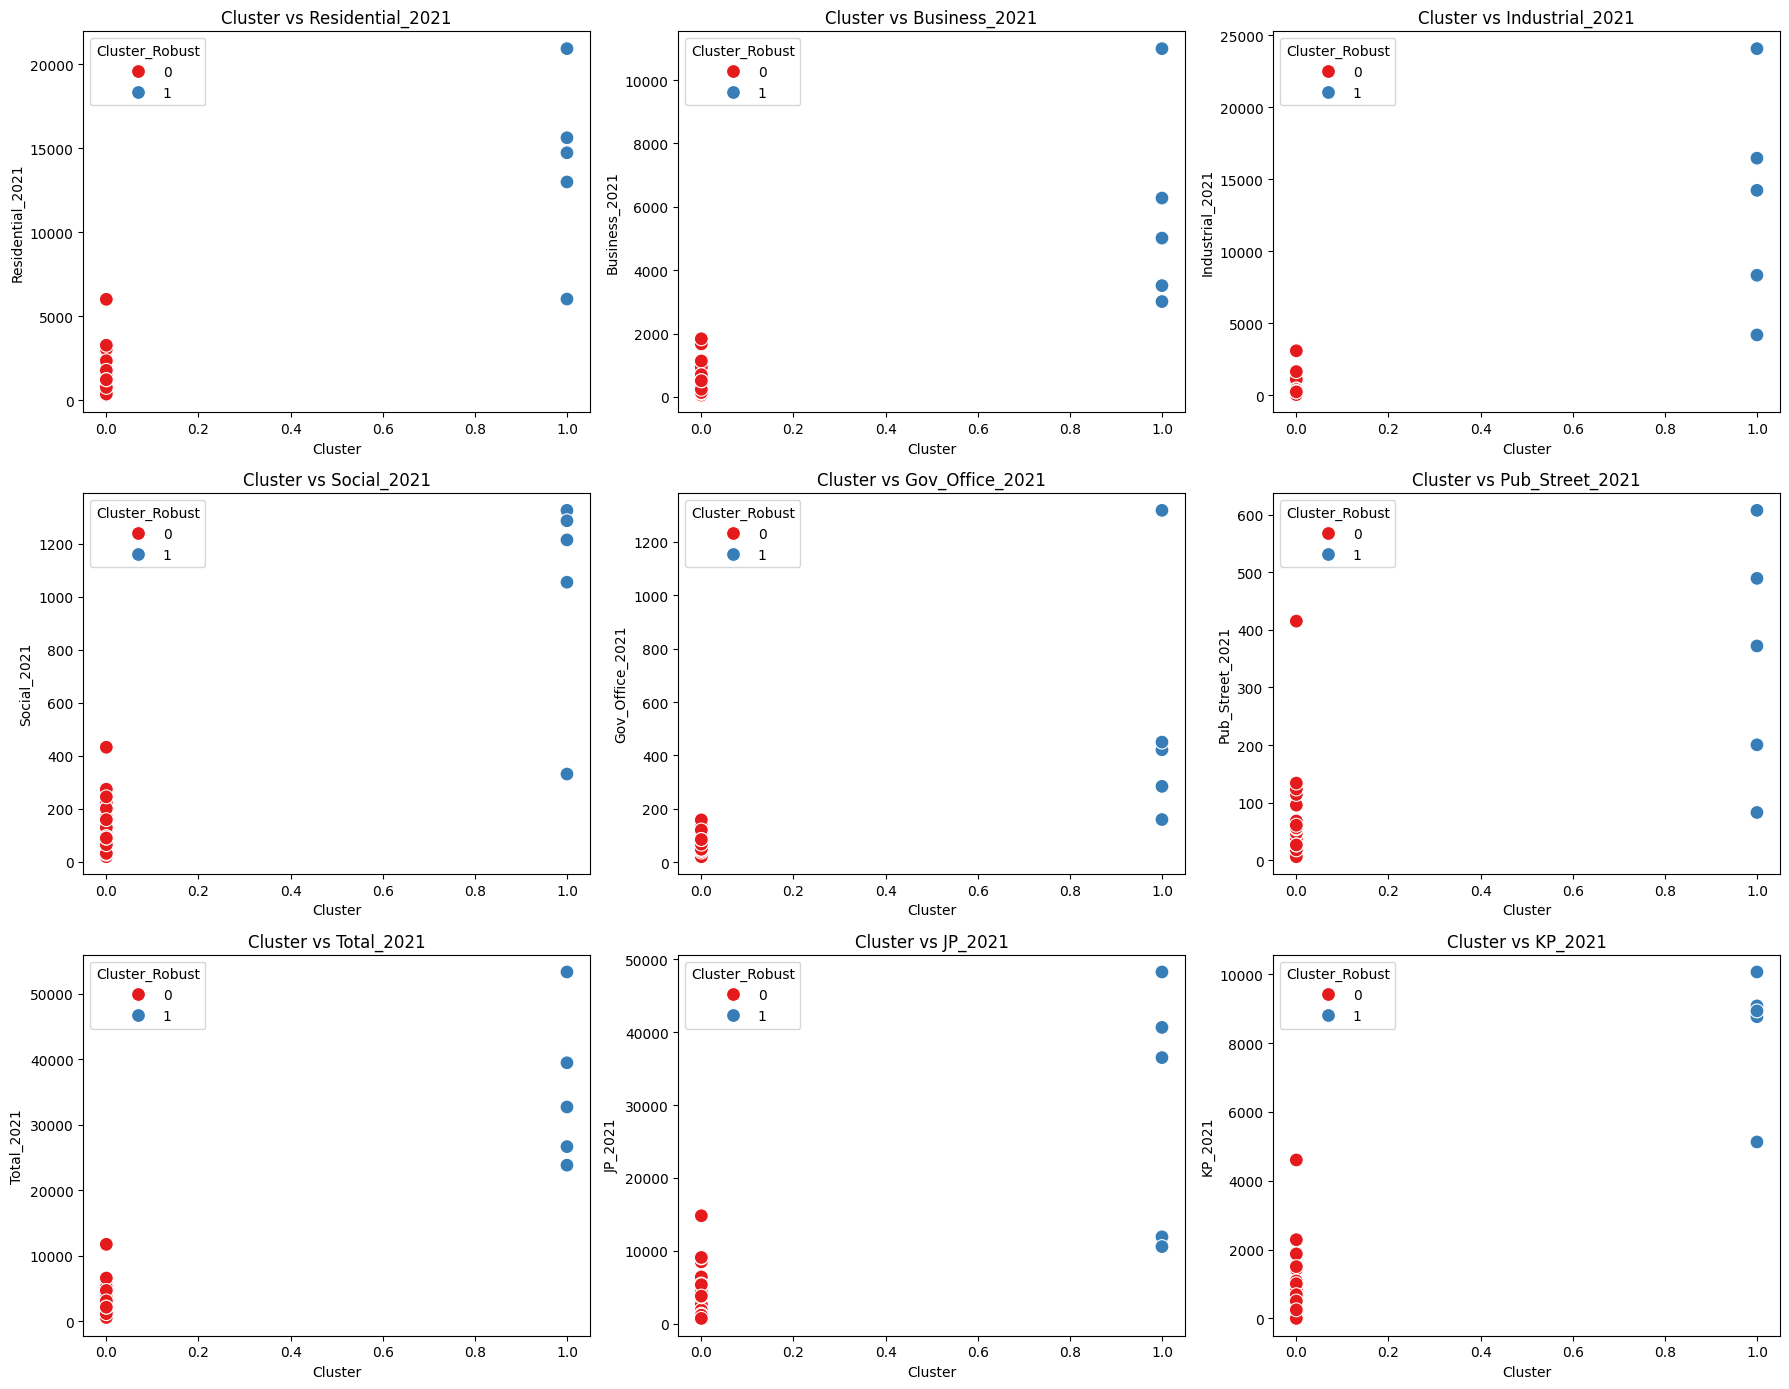

In [7]:
plt.figure(figsize=(18, 14))

for i, feature in enumerate(features_2021, 1):
    plt.subplot(3, 3, i)  
    sns.scatterplot(x='Cluster_Robust', y=feature, data=data_final, hue='Cluster_Robust', palette='Set1', s=100)
    plt.title(f'Cluster vs {feature}')
    plt.xlabel('Cluster')
    plt.ylabel(f'{feature}')

plt.tight_layout()
plt.show()


In [8]:
features2 = ['Residential_2022', 'Business_2022', 'Industrial_2022', 'Social_2022', 'Gov_Office_2022', 'Pub_Street_2022', 'Total_2022', 'JP_2022', 'KP_2022']

data_T2022 = data_final[features2]

robust_scaler2 = RobustScaler()
data_scaled_2022 = robust_scaler2.fit_transform(data_T2022)

kmeans_robust2 = KMeans(n_clusters=2, random_state=45)
data_T2022['Cluster_Robust2'] = kmeans_robust2.fit_predict(data_scaled_2022)

centroids_robust2 = kmeans_robust2.cluster_centers_
print("Centroid dengan RobustScaler:", centroids_robust2)

Centroid dengan RobustScaler: [[ 0.0408891   0.03282121  0.28952894  0.13686764 -0.08594273  0.15791122
   0.14042352 -0.03216991  0.04211219]
 [ 5.53269221  6.46505101 13.18601352  5.67467517  7.38507395  2.95057125
   7.66087371  6.36224135  8.2782759 ]]


C:\Users\Jeff\AppData\Local\Temp\ipykernel_5688\4041510774.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_T2022['Cluster_Robust2'] = kmeans_robust2.fit_predict(data_scaled_2022)


In [9]:
data_final['Cluster_Robust2'] = kmeans_robust2.fit_predict(data_scaled_2022)
provinsi_per_cluster2 = data_final[['Province', 'Cluster_Robust2']].sort_values(by='Cluster_Robust2')

for cluster in range(2):  
    print(f"Provinsi dalam Cluster {cluster}:")
    print(provinsi_per_cluster2[provinsi_per_cluster2['Cluster_Robust2'] == cluster]['Province'].tolist())
    print("\n")

Provinsi dalam Cluster 0:
['Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Kep. Riau', 'Sumatera Selatan', 'Jambi', 'Bengkulu', 'Kep. Bangka Belitung', 'Lampung', 'Kalimantan Barat', 'Kalimantan Selatan', 'Kalimantan Tengah', 'Sulawesi Utara', 'Gorontalo', 'Sulawesi Tengah', 'Sulawesi Selatan', 'Sulawesi Tenggara', 'Sulawesi Barat', 'Maluku', 'Maluku Utara', 'Papua', 'Papua Barat', 'Bali', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'DI Yogyakarta', 'Kalimantan Timur', 'Kalimantan Utara']


Provinsi dalam Cluster 1:
['Jawa Barat', 'Jawa Tengah', 'Jawa Timur', 'DKI Jakarta', 'Banten']




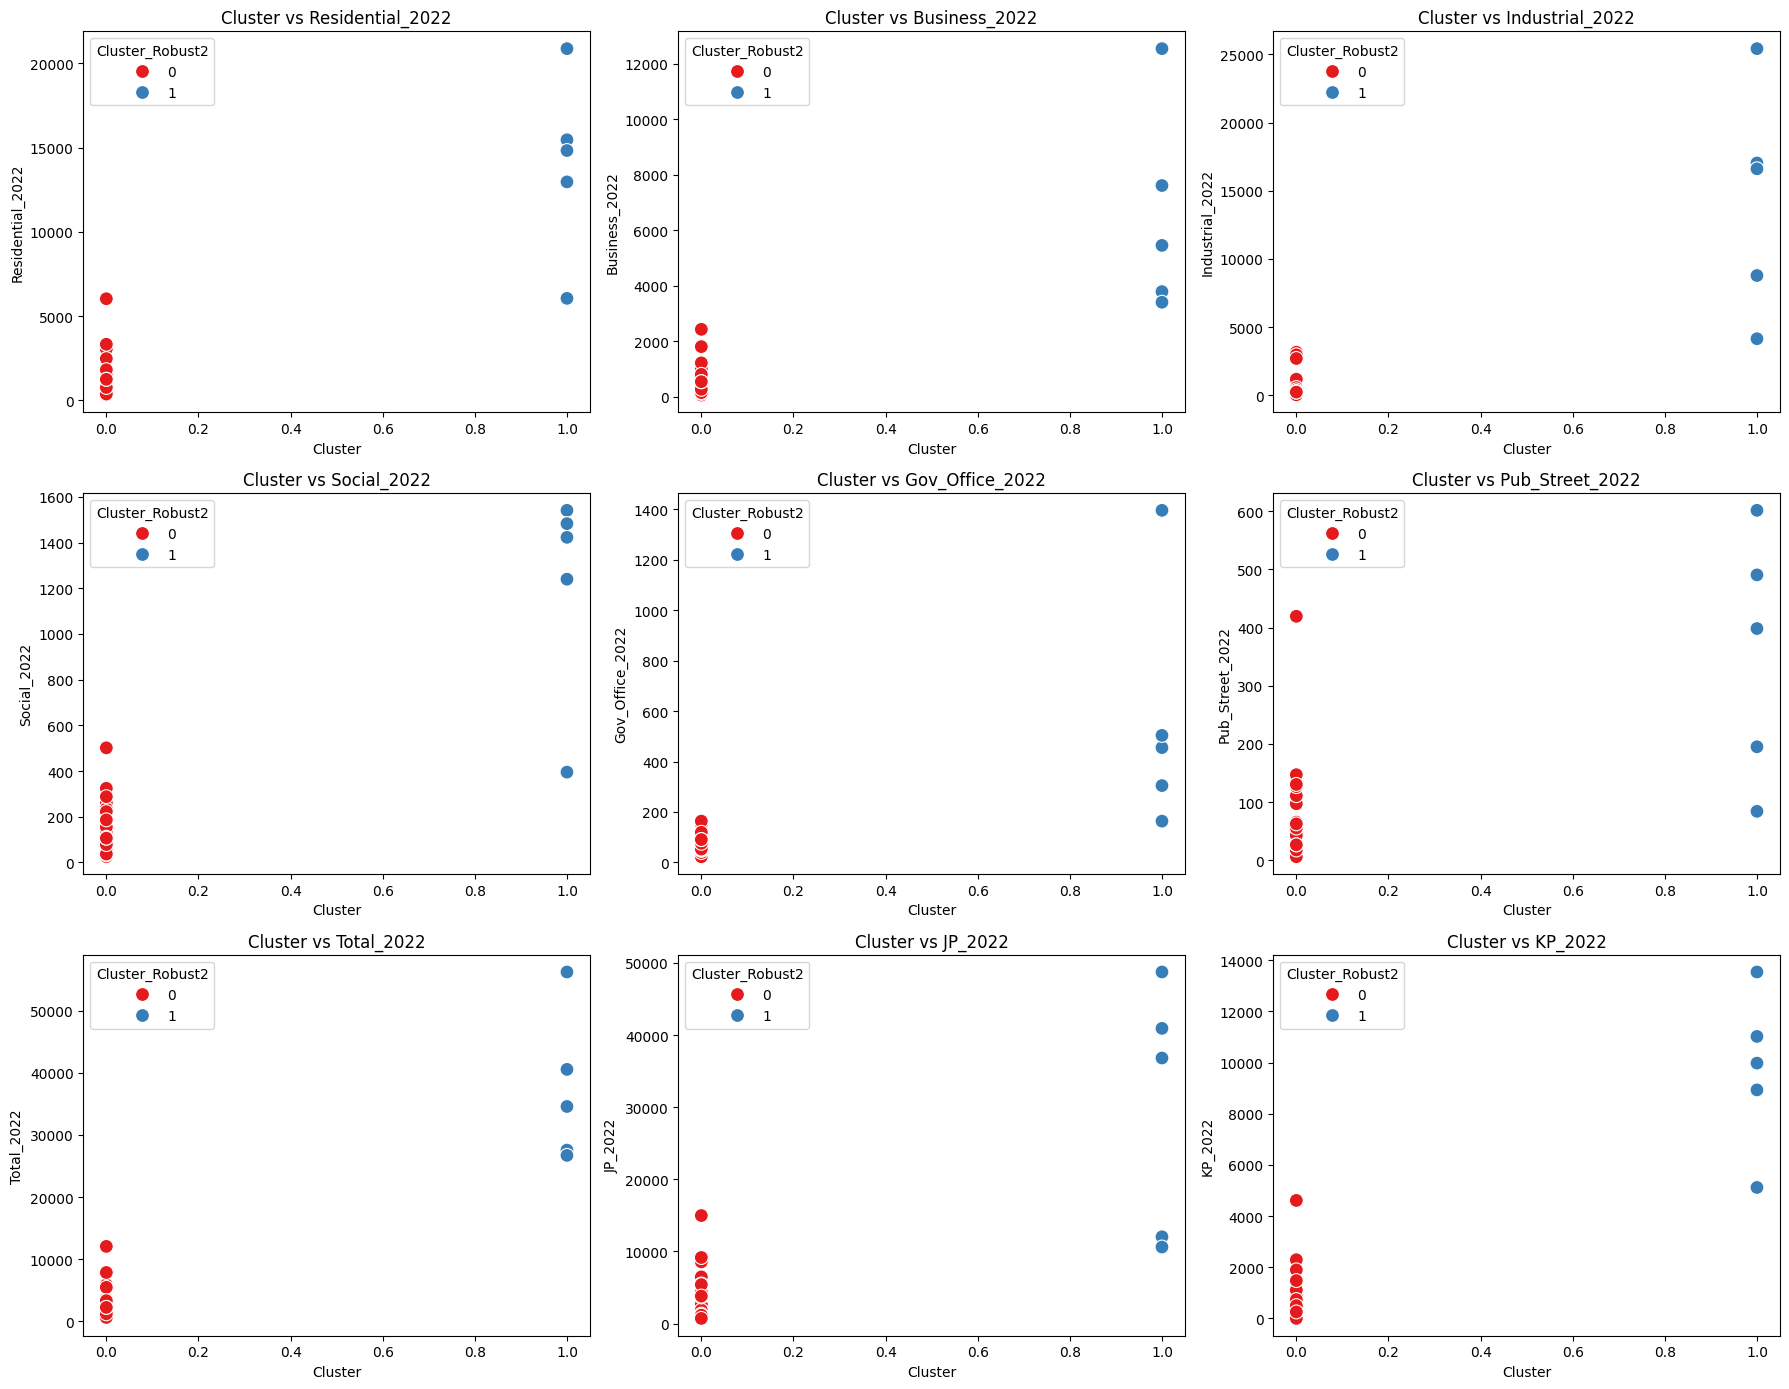

In [10]:
plt.figure(figsize=(18, 14))

for i, feature in enumerate(features2, 1):
    plt.subplot(3, 3, i)  
    sns.scatterplot(x='Cluster_Robust2', y=feature, data=data_final, hue='Cluster_Robust2', palette='Set1', s=100)
    plt.title(f'Cluster vs {feature}')
    plt.xlabel('Cluster')
    plt.ylabel(f'{feature}')

plt.tight_layout()
plt.show()


In [11]:
features3 = ['Residential', 'Business', 'Industrial', 'Social', 'Gov_Office', 'Pub_Street', 'Total', 'JP_2023', 'KP_2023']

data_T2023 = data_final[features3]

robust_scaler3 = RobustScaler()
data_scaled_2023 = robust_scaler3.fit_transform(data_T2023)

kmeans_robust3 = KMeans(n_clusters=2, random_state=45)
data_T2023['Cluster_Robust3'] = kmeans_robust3.fit_predict(data_scaled_2023)

centroids_robust3 = kmeans_robust3.cluster_centers_
print("Centroid dengan RobustScaler:", centroids_robust3)

Centroid dengan RobustScaler: [[ 0.03788054  0.03540252  0.27619479  0.13607395 -0.09625885  0.15971829
   0.12667402 -0.02873405  0.06603125]
 [ 5.478069    6.63788314 12.83324746  5.72773018  7.81516452  2.95397294
   7.21334791  6.33163355  7.40208596]]


C:\Users\Jeff\AppData\Local\Temp\ipykernel_5688\1622757882.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_T2023['Cluster_Robust3'] = kmeans_robust3.fit_predict(data_scaled_2023)


In [12]:
data_final['Cluster_Robust3'] = kmeans_robust3.fit_predict(data_scaled_2023)
provinsi_per_cluster3 = data_final[['Province', 'Cluster_Robust3']].sort_values(by='Cluster_Robust3')

for cluster in range(2):  
    print(f"Provinsi dalam Cluster {cluster}:")
    print(provinsi_per_cluster3[provinsi_per_cluster3['Cluster_Robust3'] == cluster]['Province'].tolist())
    print("\n")

Provinsi dalam Cluster 0:
['Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Kep. Riau', 'Sumatera Selatan', 'Jambi', 'Bengkulu', 'Kep. Bangka Belitung', 'Lampung', 'Kalimantan Barat', 'Kalimantan Selatan', 'Kalimantan Tengah', 'Sulawesi Utara', 'Gorontalo', 'Sulawesi Tengah', 'Sulawesi Selatan', 'Sulawesi Tenggara', 'Sulawesi Barat', 'Maluku', 'Maluku Utara', 'Papua', 'Papua Barat', 'Bali', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'DI Yogyakarta', 'Kalimantan Timur', 'Kalimantan Utara']


Provinsi dalam Cluster 1:
['Jawa Barat', 'Jawa Tengah', 'Jawa Timur', 'DKI Jakarta', 'Banten']




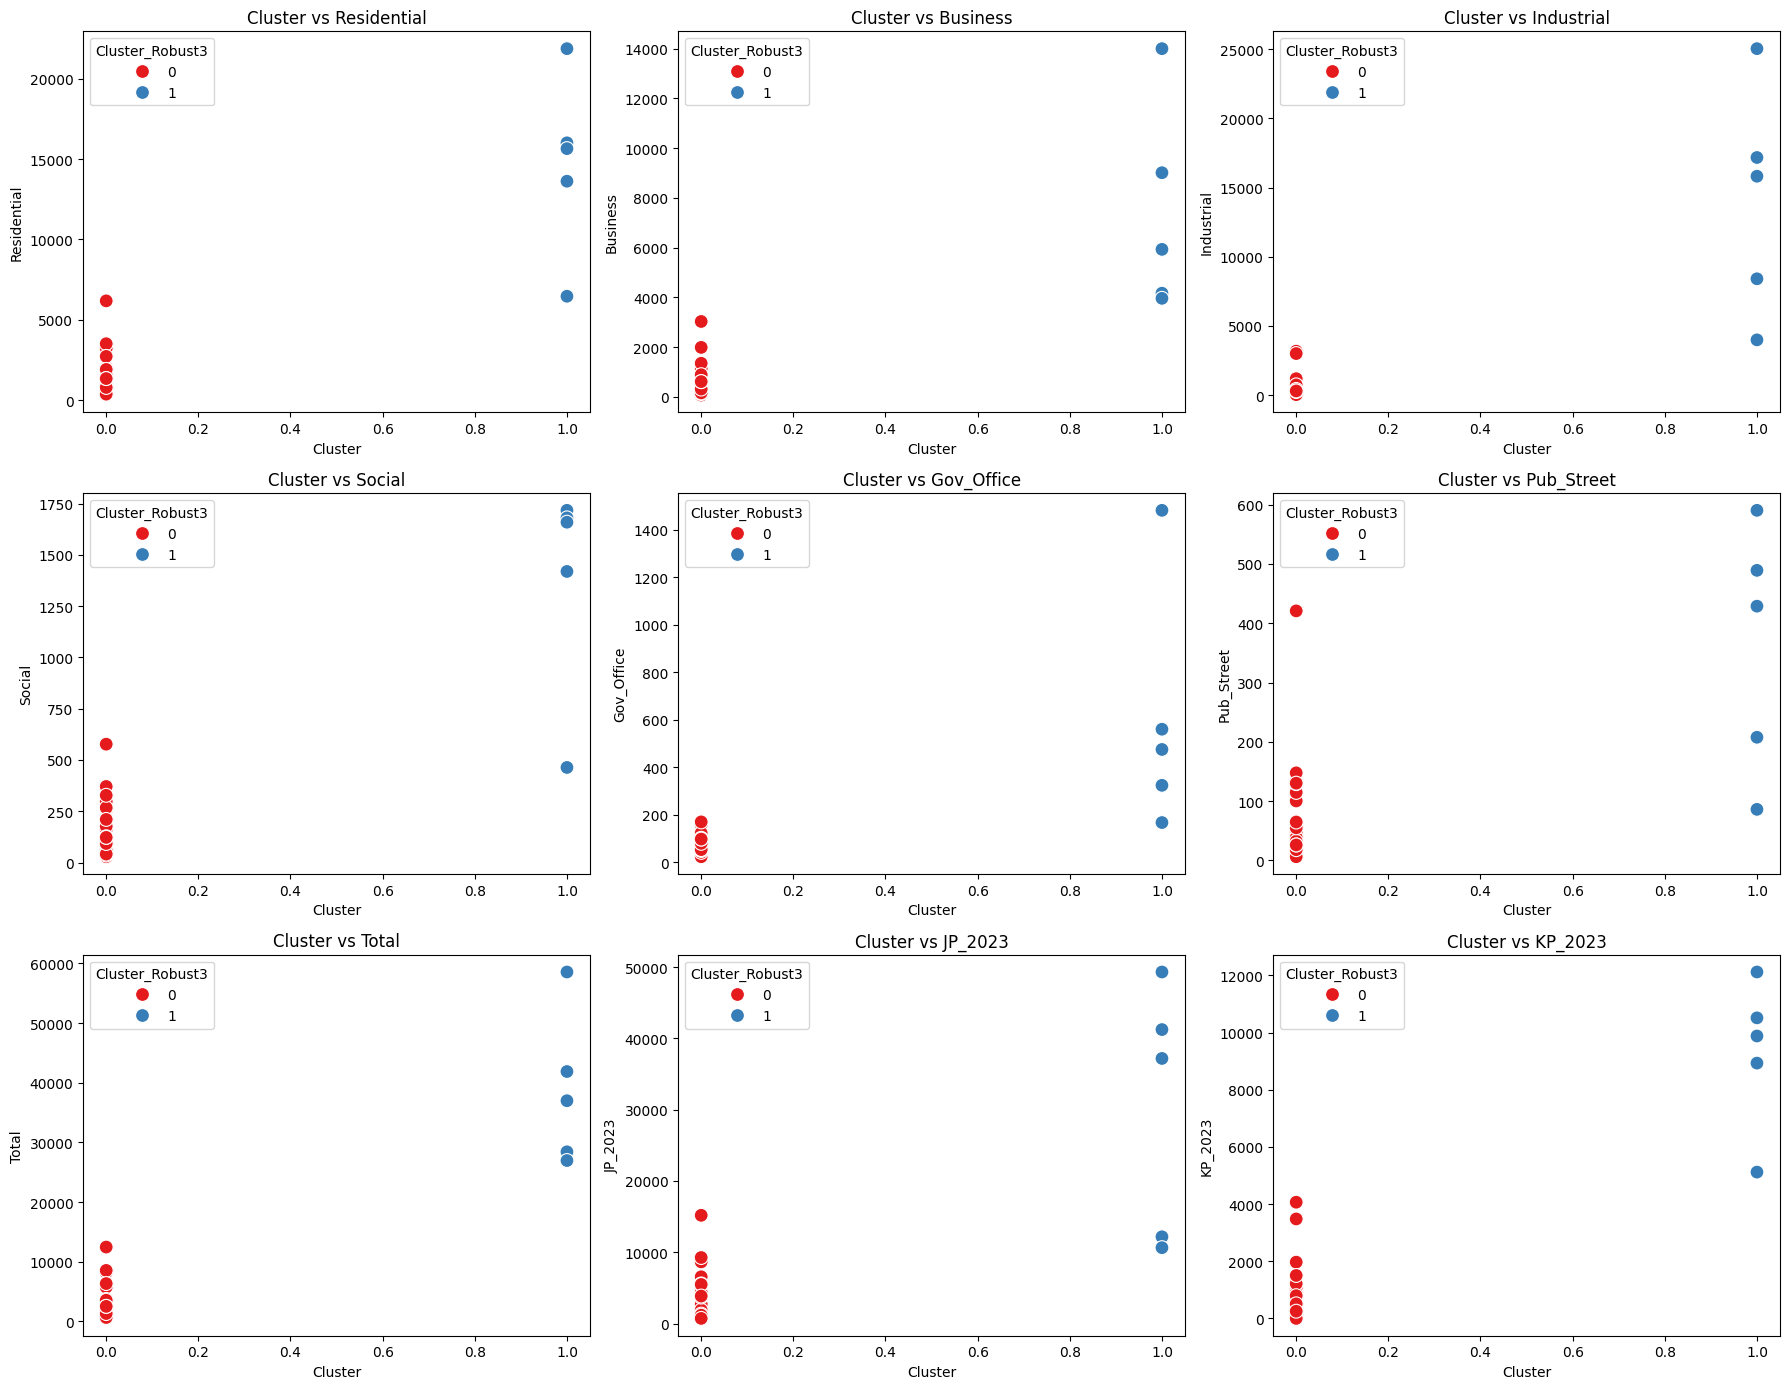

In [13]:
plt.figure(figsize=(18, 14))

for i, feature in enumerate(features3, 1):
    plt.subplot(3, 3, i)  
    sns.scatterplot(x='Cluster_Robust3', y=feature, data=data_final, hue='Cluster_Robust3', palette='Set1', s=100)
    plt.title(f'Cluster vs {feature}')
    plt.xlabel('Cluster')
    plt.ylabel(f'{feature}')

plt.tight_layout()
plt.show()


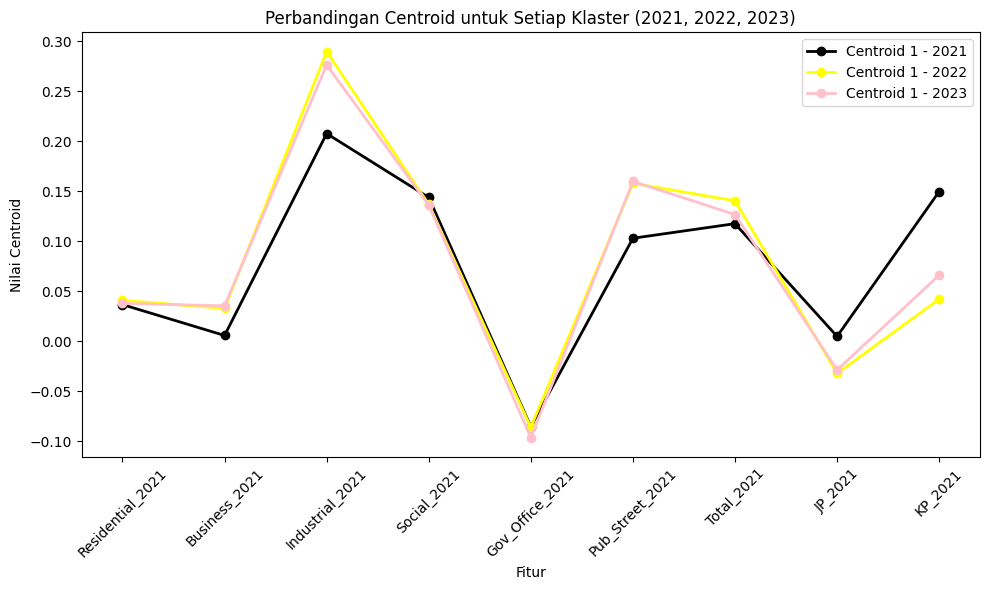

In [17]:
plt.figure(figsize=(10, 6))

plt.plot(features_2021, centroids_robust[0], label="Centroid 1 - 2021", marker='o', color='black', linestyle='-', linewidth=2)
plt.plot(features_2021, centroids_robust2[0], label="Centroid 1 - 2022", marker='o', color='yellow', linestyle='-', linewidth=2)
plt.plot(features_2021, centroids_robust3[0], label="Centroid 1 - 2023", marker='o', color='pink', linestyle='-', linewidth=2)

plt.xlabel('Fitur')
plt.ylabel('Nilai Centroid')
plt.title('Perbandingan Centroid untuk Setiap Klaster (2021, 2022, 2023)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
from sklearn.metrics import silhouette_score

sil_score_2021 = silhouette_score(data_scaled_2021, data_final['Cluster_Robust'])
print(f"Silhouette Score untuk 2021: {sil_score_2021}")

sil_score_2022 = silhouette_score(data_scaled_2022, data_final['Cluster_Robust2'])
print(f"Silhouette Score untuk 2022: {sil_score_2022}")

sil_score_2023 = silhouette_score(data_scaled_2023, data_final['Cluster_Robust3'])
print(f"Silhouette Score untuk 2023: {sil_score_2023}")

Silhouette Score untuk 2021: 0.8133220488555215
Silhouette Score untuk 2022: 0.8116370248906389
Silhouette Score untuk 2023: 0.8052039869077368
